In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
import time

# 셀레니움을 활용한 CCTV 화면 캡처

In [ ]:
for i in range(10):
    browser = webdriver.Chrome(executable_path='./chromedriver')
    browser.get('http://www.utic.go.kr/view/map/cctvStream.jsp?cctvid=E04004&cctvname=%255B%25EA%25B0%2595%25EB%25B3%2580%25EB%25B6%2581%25EB%25A1%259C%255D%2520%25EA%25B0%2580%25EC%2596%2591%25EB%258C%2580%25EA%25B5%2590~%25EB%2582%259C%25EC%25A7%2580IC&kind=A&cctvip=176&cctvch=null&id=1&cctvpasswd=null&cctvport=445&minX=126.79873844156069&minY=37.523181398197465&maxX=127.01854446166621&maxY=37.609748151015005')
    time.sleep(5)
    browser.find_element_by_css_selector("#vid > div.vjs-control-bar > button.vjs-fullscreen-control.vjs-control.vjs-button").click()
    time.sleep(5)
    scrennshot = browser.save_screenshot(f'./screenshot/scrennshot{i+1}.png')

    print(f"{i+1}번째 캡처 완료했습니다!")  
    print(time.strftime('%m월 %d일 %H시 %M분 %S초', time.localtime(time.time())))
    time.sleep(10)
    
    # 이렇게 하면 15초 간격으로 촬영할 수 있게 됨
    
browser.quit


## YOLOv5 모델

### 모델 다운로드

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13329, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 13329 (delta 30), reused 39 (delta 29), pack-reused 13286
Receiving objects: 100% (13329/13329), 12.06 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (9283/9283), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-178-g4870064 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/3 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.030s)
image 2/3 /content/yolov5/data/images/croppedImage.PNG: 192x640 35 cars, Done. (0.020s)
image 3/3 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.027s)
Speed: 0.4ms pre-process, 25.6ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


# 모델 실행 후 캡처 이미지에 모델 적용

In [ ]:
from PIL import Image

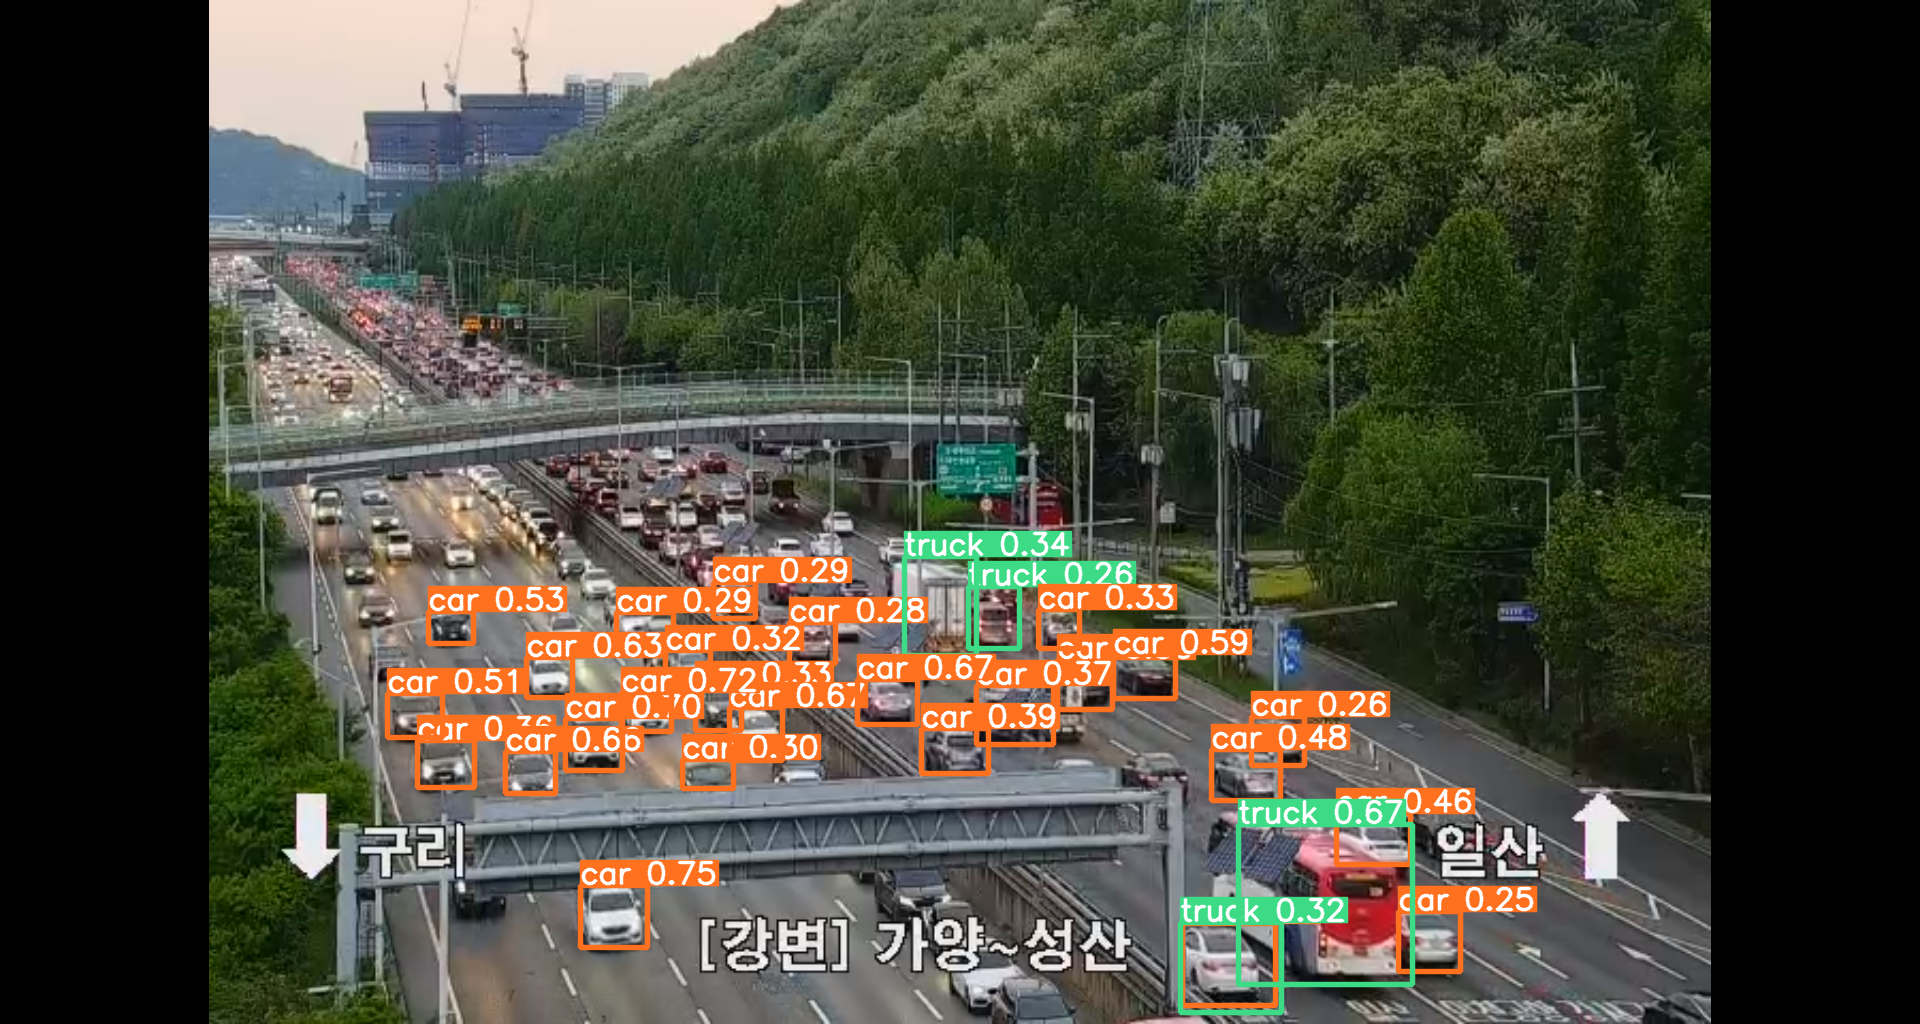

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp3/scrennshot1.png')

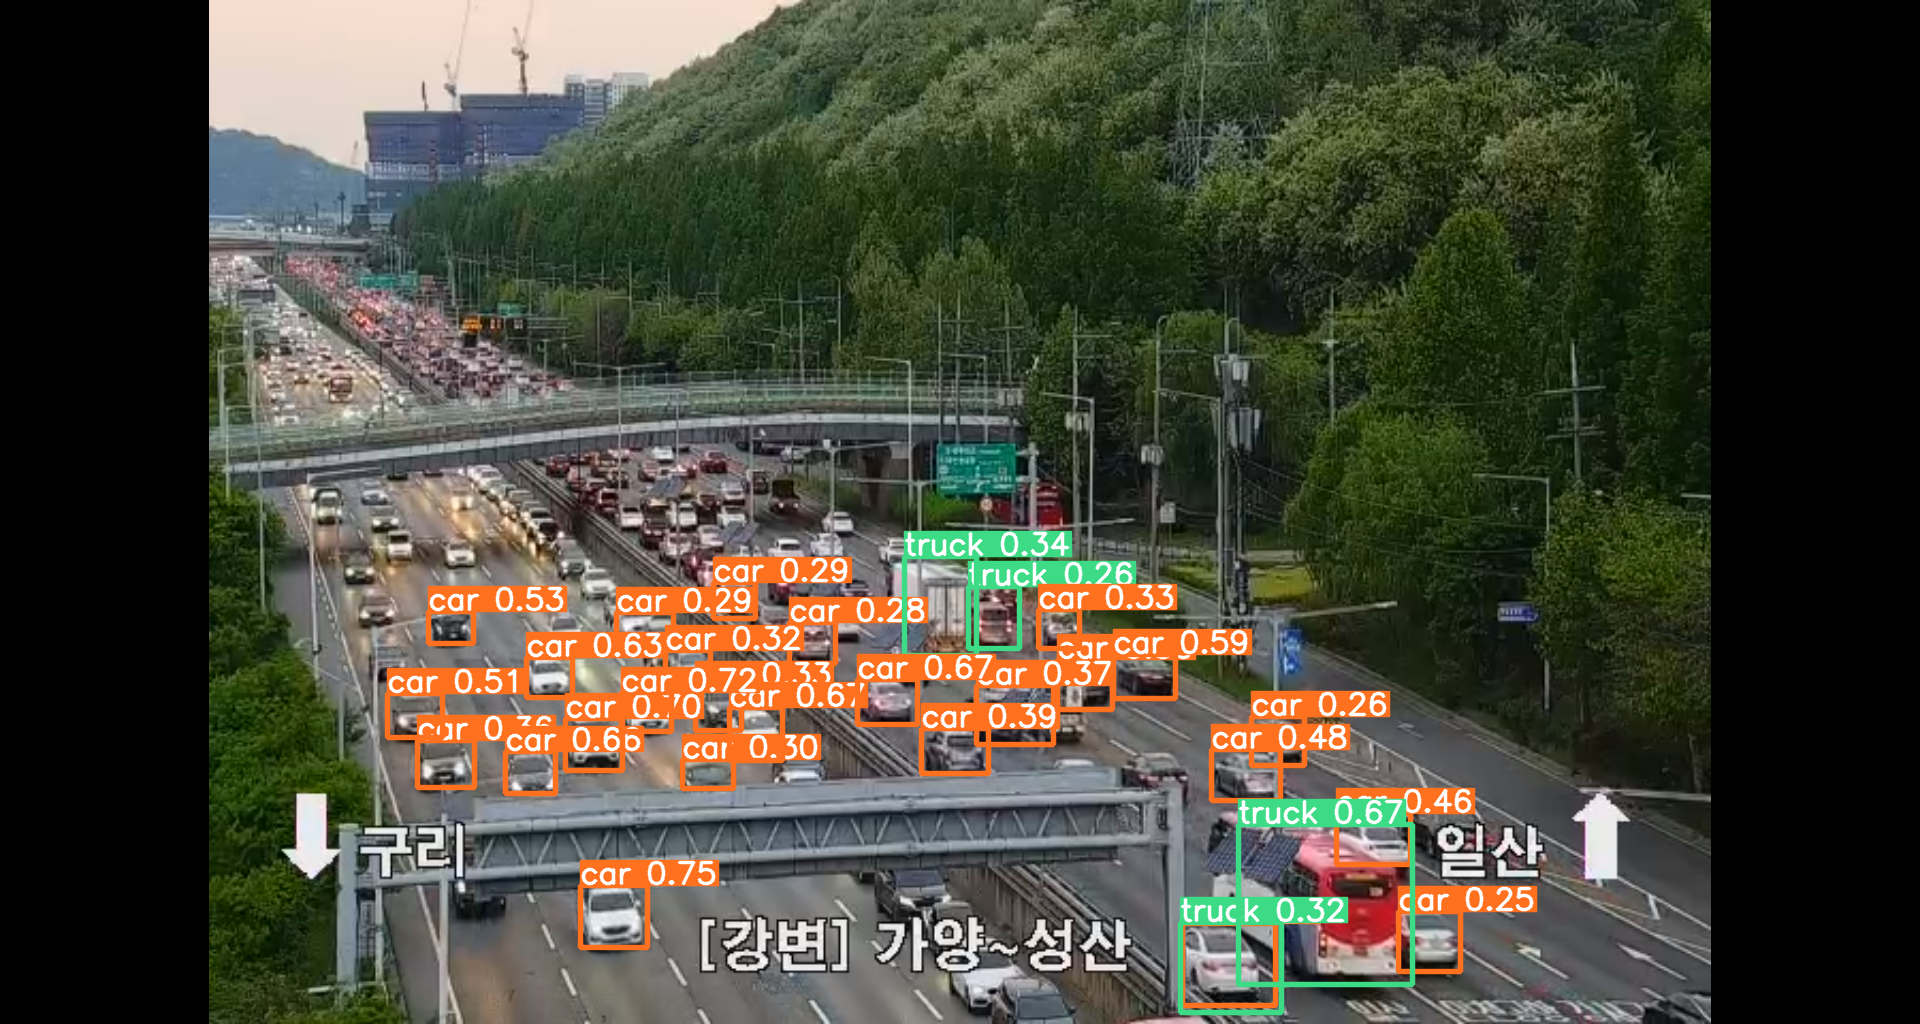

In [ ]:
Image(filename = '/content/yolov5/runs/detect/exp2/scrennshot1.png')